## **Descriptive Statistics**

**Descriptive Statistics** is about describing and summarizing data, using 2 main approaches
1. Quantitative Approach: describes and summarizes data numerically.
2. Visual Approach: illustrates data with charts, plots, histograms, and other graphs.

Types of Measures:
1. Central tendency: describes centers of the data. (e.g. mean, median, mode)
2. Variability: describes the spread of the data. (e.g. variance, standard deviation)
3. Correlation or Joint variability: describes the relation between a pair of variables in a dataset. (e.g. covariance, correlation efficient)

- Population: set of all elements or items that you’re interested in
- Sample: subset of a population
- Outliers: data point that differs significantly from the majority of the data taken from a sample or population.
- Causes of Outliers:
    - Natural variation in data
    - Change in the behavior of the observed system
    - Errors in data collection

### **Libraries for Statistical Calculations**

1. Python’s **statistics**: built-in Python library for descriptive statistics. You can use it if your datasets are not too large or if you can’t rely on importing other libraries.

2. **NumPy**: third-party library for numerical computing, optimized for working with single- and multi-dimensional arrays. Its primary type is the array type called ndarray. This library contains many routines for statistical analysis.

3. **SciPy**: third-party library for scientific computing based on NumPy. It offers additional functionality compared to NumPy, including scipy.stats for statistical analysis.

4. **Pandas**: third-party library for numerical computing based on NumPy. It excels in handling labeled one-dimensional (1D) data with Series objects and two-dimensional (2D) data with DataFrame objects.

5. **Matplotlib**: third-party library for data visualization. It works well in combination with NumPy, SciPy, and Pandas.

In [9]:
!pip install scipy
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 54.9/54.9 kB ? eta 0:00:00
     ------------------------------------- 960.8/960.8 kB 20.2 MB/s eta 0:00:00


In [18]:
import math
import statistics # for descriptive statistics
import numpy as np # for single/multi dimensional arrays
import scipy.stats # scientific computing based on numpy
import pandas as pd 
import matplotlib.pyplot # for data visualization

### **Calculating Descriptive Statistics**

In [14]:
# creating arbitrary data to work with
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
x

x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

nan = not-a-number value
You can use any of the following interchangeably to get a NaN value:
float('nan')
math.nan
np.nan

In [15]:
math.isnan(np.nan), np.isnan(math.nan)

(True, True)

Create np.ndarray and pd.Series objects that correspond to x and x_with_nan:

In [19]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

In [20]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

In [21]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [22]:
y_with_nan

array([ 8. ,  1. ,  2.5,  nan,  4. , 28. ])

In [23]:
z

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64

In [24]:
z_with_nan

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64

### **Measures of Central Tendency**

1. Mean/Average
2. Weighted mean/Weighted avg
3. Geometric mean
4. Harmonic mean
5. Median
6. Mode

**Mean**

In [25]:
#You can calculate the mean with pure Python using sum() and len()
mean_ = sum(x) / len(x)
mean_

8.7

In [27]:
#You can also apply built-in Python statistics functions
mean_ = statistics.mean(x)
mean_

mean_ = statistics.mean(x)
mean_

8.7

In [29]:
# If there are NaN values among your data, then statistics.mean() and statistics.fmean() will return nan as the output:
mean_ = statistics.mean(x_with_nan)
mean_

mean_ = statistics.mean(x_with_nan)
mean_

nan

In [30]:
#If you use NumPy, then you can get the mean with np.mean():
mean_ = np.mean(y)
mean_


8.7

In [31]:
#In the example above, mean() is a function, but you can use the corresponding method .mean() as well:

In [32]:
mean_ = y.mean()
mean_


8.7

In [33]:
#  mean() and .mean() from NumPy returns same result as statistics.mean(). Also, same result if there are NaN values among your data:
np.mean(y_with_nan)

y_with_nan.mean()

nan

In [34]:
# You can ignore all NaN vaules by using np.nanmean(), which returns same value as mean()
np.nanmean(y_with_nan)

8.7

In [35]:
#pd.Series objects also have the method .mean() and ignores NaN values by default:
mean_ = z.mean()
mean_
z_with_nan.mean()


8.7

**Weighted Mean**
- very handy when you need the mean of a dataset containing items that occur with given relative frequencies.

In [36]:
# arbitrary dataset
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [37]:
# You can use weighted mean in pure Python (no libraries) by combining sum() with either range() or zip():
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
wmean

6.95

In [38]:
# If you have large datasets, using NumPy np.average is better
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
wmean

wmean = np.average(z, weights=w)
wmean

6.95

In [39]:
# You can also use this method on ordinary lists and tuples.
# Or you can use w * y with np.sum() or .sum():
(w * y).sum() / w.sum()

6.95

In [40]:
# be careful if your dataset contains nan values:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()

np.average(y_with_nan, weights=w)

np.average(z_with_nan, weights=w)

nan

**Harmonic Mean**
-  reciprocal of the mean of the reciprocals of all items in the dataset: 𝑛 / Σᵢ(1/𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in the dataset 𝑥. 

In [41]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [42]:
# or you can use statistics.harmonic_mean():
hmean = statistics.harmonic_mean(x)
hmean


2.7613412228796843

In [43]:
# If you have a nan value in a dataset, returns nan.
statistics.harmonic_mean(x_with_nan)

nan

In [44]:
# If you have at least one 0, returns 0

statistics.harmonic_mean([1, 0, 2])

0

In [45]:
# If you have at least one negative number, returns statistics.StatisticsError 
statistics.harmonic_mean([1, 2, -2]) 

StatisticsError: harmonic mean does not support negative values

In [46]:
# also can use: scipy.stats.hmean():
scipy.stats.hmean(y)

scipy.stats.hmean(z)

# if your dataset contains nan, 0, a negative number, or anything but positive numbers, then you’ll get a ValueError!

2.7613412228796843

**Geometric Mean** 
-  the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset 𝑥: ⁿ√(Πᵢ𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛.

In [47]:
gmean = 1
for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean


4.677885674856041

In [51]:
# can also use:
scipy.stats.gmean(y)

scipy.stats.gmean(z)

# If you have nan values in a dataset, then gmean() will return nan. 
# If there’s at least one 0, then it’ll return 0.0 and give a warning. 
# If you provide at least one negative number, then you’ll get nan and the warning.

4.67788567485604

**Median** 
- the middle element of a sorted dataset (increasing or decreasing order)

In [53]:
#Sorting the elements of the dataset
#Finding the middle element(s) in the sorted dataset

n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_


4

In [54]:
median_ = statistics.median(x) # odd number of elements
median_ 

4

In [55]:
# x-1 is without the last item 28
median_ = statistics.median(x[:-1]) ##even number of elements
median_


3.25

In [56]:
# If nbumber of elements is EVEN, use median_low() and median_high() to returnthe 2 middle values
statistics.median_low(x[:-1])


2.5

In [57]:
statistics.median_high(x[:-1])

4

In [58]:
# if there are nan values using median, median_low, median_high, doesn't return nan 
statistics.median(x_with_nan)

6.0

In [59]:
statistics.median_low(x_with_nan)

4

In [61]:
statistics.median_high(x_with_nan)

8.0

In [60]:
# can also use np,.median() to get median
median_ = np.median(y)
median_


4.0

In [62]:
# can also use np,.median() to get median
median_ = np.median(y[:-1])
median_


3.25

In [63]:
#  if there’s a nan value in your dataset, then np.median() issues the RuntimeWarning and returns nan. 
# If this behavior is not what you want, then you can use nanmedian() to ignore all nan values:
np.nanmedian(y_with_nan)

4.0

In [64]:
np.nanmedian(y_with_nan[:-1])

# The obtained results are the same as with statistics.median() and np.median() applied to the datasets x and y.

3.25

In [65]:
# Pandas Series objects have the method .median() that ignores nan values by default:
z.median()

z_with_nan.median()

4.0

**Mode**
- the value in the dataset that occurs most frequently

In [66]:
# pure python
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [68]:
v = [12, 15, 12, 15, 21, 15, 12]
statistics.mode(v)  # Raises StatisticsError
statistics.multimode(v)

StatisticsError: no unique mode; found 2 equally common values

In [69]:
# statistics.mode() and statistics.multimode() handle nan values as regular values and can return nan as the modal value:
statistics.mode([2, math.nan, 2])

2

In [71]:
statistics.mode([2, math.nan, 0, math.nan, 5])

nan

In [74]:
# You can also get the mode with scipy.stats.mode():
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [75]:
mode_ = scipy.stats.mode(v)
mode_


ModeResult(mode=array([12]), count=array([3]))

In [76]:
# You can get the mode and its number of occurrences as NumPy arrays with dot notation:
mode_.mode

array([12])

In [77]:
mode_.count

array([3])

In [78]:
# Pandas Series objects have the method .mode() that handles multimodal values well and ignores nan values by default:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
u.mode()

0    2
dtype: int32

In [79]:
v.mode()

0    12
1    15
dtype: int32

In [80]:
w.mode()

0    2.0
dtype: float64

### Measures of Variabiilty

- Variance
- Standard deviation
- Skewness
- Percentiles
- Ranges

**Variance**
- quanitfies the spread of the data
- shows numerically how far the data points are from the mean

In [81]:
# pure Python
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [82]:
# or existing function statistics.variance():
var_ = statistics.variance(x)
var_

123.2

In [83]:
# If you have nan values among your data, then statistics.variance() will return nan:
statistics.variance(x_with_nan)


nan

In [84]:
# NumPy: use the function np.var() or the corresponding method .var():
var_ = np.var(y, ddof=1)
var_

var_ = y.var(ddof=1)
var_


123.19999999999999

In [85]:
# If you have nan values in the dataset, then np.var() and .var() will return nan:
np.var(y_with_nan, ddof=1)

y_with_nan.var(ddof=1)

nan

In [86]:
# If you want to skip nan values, then you should use np.nanvar():
np.nanvar(y_with_nan, ddof=1)

123.19999999999999

In [87]:
# Also need to specify ddof=1

np.nanvar(y_with_nan, ddof=1)

123.19999999999999

In [88]:
#pd.Series objects have the method .var() that skips nan values by default:
z.var(ddof=1)

z_with_nan.var(ddof=1)


123.19999999999999

**Standard Deviation** 
- another measure of data spread
- connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. 
- often more convenient than the variance because it has the same unit as the data points. 
- Once you get the variance, you can calculate the standard deviation with pure Python:

In [89]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [90]:
# or can use statistics.stdev():
std_ = statistics.stdev(x)
std_


11.099549540409287

In [91]:
#numpy
np.std(y, ddof=1)

y.std(ddof=1)

11.099549540409285

In [92]:
#numpy
np.std(y_with_nan, ddof=1)
y_with_nan.std(ddof=1)


nan

In [93]:
#numpy
np.nanstd(y_with_nan, ddof=1)

11.099549540409285

In [94]:
#pandas, skips nan by default

z.std(ddof=1)

z_with_nan.std(ddof=1)


11.099549540409285

**Population Standard Deviation**
- refers to the entire population 
- Find the square root of the population variance in the pure Python implementation.
- Use statistics.pstdev() instead of statistics.stdev().
- Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.

**Skewness**
- measures the asymmetry of a data sample
- negative skewness values: indicate that there’s a dominant tail on the left side
- Positive skewness values correspond to a longer or fatter tail on the right side 
- If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

In [98]:
# pure python
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x)
         * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.9470432273905929

In [96]:
# sample skewness with scipy
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

scipy.stats.skew(y_with_nan, bias=False)

nan

In [97]:
#pandas
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

z_with_nan.skew()


1.9470432273905924

**Percentiles**
- the element in the dataset such that p% of the elements in the dataset are less than or equal to that value
Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

- first quartile is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
- second quartile is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
- third quartile is the sample 75th percentiles.  It divides roughly 25% of the largest items from the rest of the dataset.


In [101]:
# find 5th percentile
y = np.array(x)
np.percentile(y, 5)

-3.44

In [102]:
#find 95th percentile
np.percentile(y, 95)

34.919999999999995

In [103]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [104]:
np.median(y)

8.0

In [105]:
# If you want to ignore nan values, then use np.nanpercentile() instead:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan


array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [106]:
np.nanpercentile(y_with_nan, [25, 50, 75])


array([ 0.1,  8. , 21. ])

In [107]:
#numpy
np.quantile(y, 0.05)

-3.44

In [108]:
np.quantile(y, 0.95)

34.919999999999995

In [109]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [110]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [111]:
# pd.Series objects have the method .quantile():
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [112]:
z.quantile(0.95)

34.919999999999995

In [113]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [114]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

**Ranges**
- the difference btwn the max and min element 

In [115]:
np.ptp(y)

np.ptp(z)

np.ptp(z_with_nan)


nan

In [116]:
np.ptp(y_with_nan)

nan

In [117]:
np.amax(y) - np.amin(y)

np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

y.max() - y.min()

z.max() - z.min()

z_with_nan.max() - z_with_nan.min()


46.0

In [118]:
# interquartile range

quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

## Summary of Descriptive Statistics

describe() returns an object that holds the following descriptive statistics:

- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [119]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result


DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [120]:
result.nobs

9

In [121]:
result.minmax[0]  # Min

-5.0

In [122]:
result.minmax[1]  # Max

41.0

In [123]:
result.mean

11.622222222222222

In [124]:
result.variance

228.75194444444446

In [125]:
result.skewness

0.9249043136685094

In [126]:
result.kurtosis


0.14770623629658886

In [127]:
# Pandas has similar, if not better, functionality. Series objects have the method .describe():
result = z.describe()
result



count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [128]:
result['mean']

result['std']

result['min']

result['max']

result['25%']

result['50%']

result['75%']

21.0

**Measures of Correlation Between Pairs of Data**
- You’ll see the following measures of correlation between pairs of data:

- Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
- Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
- Weak or no correlation exists if there is no such apparent relationship.

In [134]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

**Covariance**
- the measure quanbtifies the strength and direction of relationship between a pair of variables 
- If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
- If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
- If the correlation is weak, then the covariance is close to zero.

In [132]:
# pure python 
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
          / (n - 1))
cov_xy

19.95

In [135]:
# numpy
cov_matrix = np.cov(x_, y_)
cov_matrix


array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [136]:
x_.var(ddof=1)

y_.var(ddof=1)


13.914285714285711

In [137]:
# The other two elements of the covariance matrix are equal and represent the actual covariance between x and y:
cov_xy = cov_matrix[0, 1]
cov_xy

cov_xy = cov_matrix[1, 0]
cov_xy


19.95

In [138]:
# pandas
cov_xy = x__.cov(y__)
cov_xy

cov_xy = y__.cov(x__)
cov_xy

19.95

**Correlation Coeffienct**
- pearson product-moment correlation coefficient (denoted as r)
- The value 𝑟 > 0 indicates positive correlation.
- The value 𝑟 < 0 indicates negative correlation.
- The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
- The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
- The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.

In [139]:
#pure python 
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [140]:
#scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

In [141]:
r, p = scipy.stats.pearsonr(x_, y_)
r

p

5.122760847201135e-07

In [142]:
#Similar to the case of the covariance matrix, you can apply np.corrcoef() with x_ and y_ as the arguments and get the correlation coefficient matrix: 
corr_matrix = np.corrcoef(x_, y_)
corr_matrix


array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [143]:
r = corr_matrix[0, 1]
r

r = corr_matrix[1, 0]
r


0.861950005631606

In [144]:
scipy.stats.linregress(x_, y_)


LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201165e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [145]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [146]:
r = x__.corr(y__)
r

r = y__.corr(x__)
r


0.861950005631606

### **Working with 2D Data** (db tables, csv, excel, calc, google spreadsheets)

In [147]:
# start by creating a 2d numpy array
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
a


array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [148]:
np.mean(a)

5.4

In [149]:
a.mean()

5.4

In [150]:
np.median(a)

2.0

In [151]:
a.var(ddof=1)

53.40000000000001

In [152]:
np.mean(a, axis=0)

a.mean(axis=0)


array([6.2, 8.2, 1.8])

In [153]:
np.mean(a, axis=1)

a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [154]:
np.median(a, axis=0)

np.median(a, axis=1)

a.var(axis=0, ddof=1)

a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [155]:
scipy.stats.gmean(a)  # Default: axis=0

scipy.stats.gmean(a, axis=0)


array([4.        , 3.73719282, 1.51571657])

In [156]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [157]:
scipy.stats.gmean(a, axis=None)


2.829705017016332

In [158]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

scipy.stats.describe(a, ddof=1, bias=False)  # Default: axis=0

scipy.stats.describe(a, axis=1, ddof=1, bias=False)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [159]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

### **DataFrames**

In [160]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [161]:
df.mean()
df.var()


A     37.2
B    121.2
C      1.7
dtype: float64

In [162]:
df.mean(axis=1)
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [163]:
df['A']


first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [164]:
df['A'].mean()

df['A'].var()

37.20000000000001

In [165]:
df.values
df.to_numpy()


array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [166]:
df.describe()


,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


### **Visualizing Data**

Presenting Data: 
- Box plots
- Histograms
- Pie charts
- Bar charts
- X-Y plots
- Heatmaps

In [168]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

**Box PLots**
-  excellent tool to visually represent descriptive statistics of a given dataset. It can show the range, interquartile range, median, mode, outliers, and all quartiles. 

In [169]:
# create arbitrary data
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

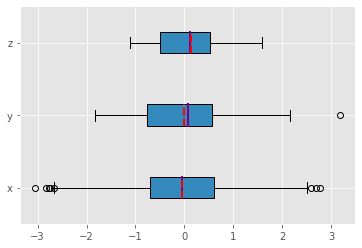

In [170]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

The parameters of .boxplot() define the following:

- x is your data.
- vert sets the plot orientation to horizontal when False. The default orientation is vertical.
- showmeans shows the mean of your data when True.
- meanline represents the mean as a line when True. The default representation is a point.
- labels: the labels of your data.
- patch_artist determines how to draw the graph.
- medianprops denotes the properties of the line representing the median.
- meanprops indicates the properties of the line or dot representing the mean

**Histograms**
- particularly useful when there are a large number of unique values in a dataset

In [171]:
hist, bin_edges = np.histogram(x, bins=10)
hist

bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

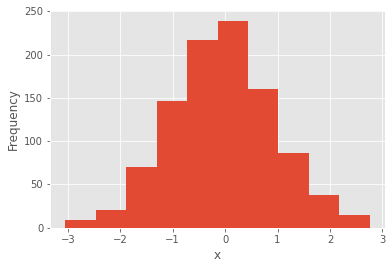

In [172]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

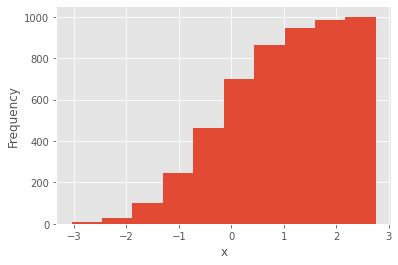

In [173]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

**Pie Charts**
- represent data with a small number of labels and given relative frequencies 

In [174]:
# Let’s define data associated to three labels:
x, y, z = 128, 256, 1024

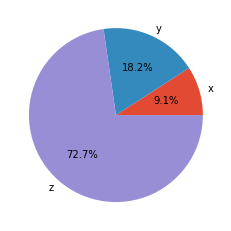

In [175]:
# Now, create a pie chart with .pie():
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

**Bar Charts**
-  illustrate data that correspond to given labels or discrete numeric values.

In [176]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

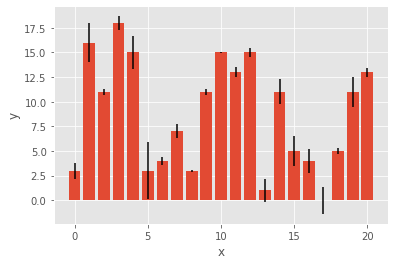

In [177]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

**X-Y Plots or Scatter Plot**
- represents the pairs of data from two datasets. 
- The horizontal x-axis shows the values from the set x, while the vertical y-axis shows the corresponding values from the set y. 

In [178]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

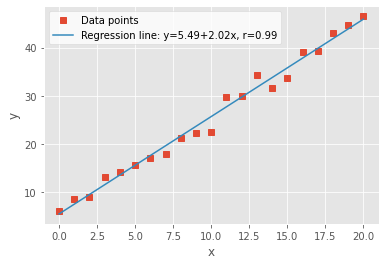

In [179]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

**Heatmaps**
-  used to visually show a matrix. 
- The colors represent the numbers or elements of the matrix

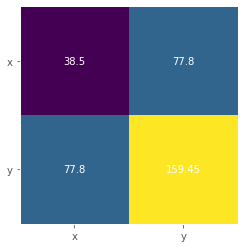

In [180]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

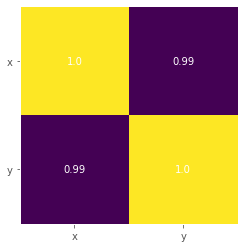

In [181]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()